# Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import linear_model

## Load startup data

In [2]:
startups = pd.read_csv('data/startups.csv')

In [3]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Extract data

In [4]:
X = startups.iloc[:, :-1].values

In [5]:
y = startups.iloc[:, 4].values

## Visualize data

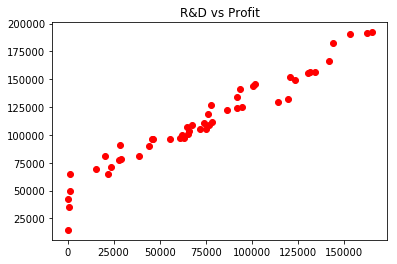

In [6]:
plt.scatter(X[:, 0], y, c='red')
plt.title("R&D vs Profit")
plt.show()

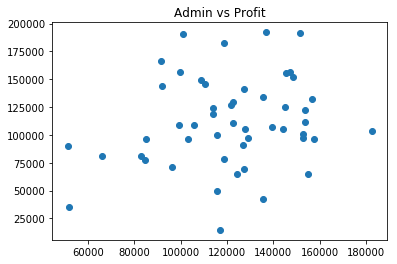

In [7]:
plt.scatter(X[:, 1], y)
plt.title("Admin vs Profit")
plt.show()

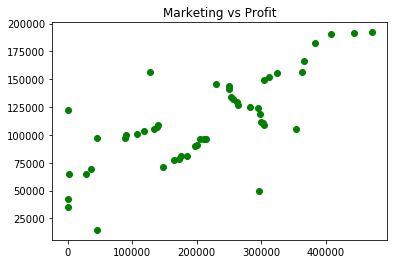

In [8]:
plt.scatter(X[:, 2], y, c='green')
plt.title("Marketing vs Profit")
plt.show()

## Encode data (State)

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
le = LabelEncoder()

In [11]:
X[:, 3] = le.fit_transform(X[:, 3])

In [12]:
ohe = OneHotEncoder(categorical_features=[3])

In [13]:
X = ohe.fit_transform(X).toarray()

In [14]:
X[0]

array([  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
         1.65349200e+05,   1.36897800e+05,   4.71784100e+05])

In [15]:
startups.iloc[0, :]

R&D Spend            165349
Administration       136898
Marketing Spend      471784
State              New York
Profit               192262
Name: 0, dtype: object

In [16]:
# Remove one dummy variable
X = X[:, 1:]

In [17]:
X[0]

array([  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
         1.36897800e+05,   4.71784100e+05])

## Split data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature scalling (no need to do this for Linear Regression, the lib will do this for us)

In [20]:
"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train[0]
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nX_train[0]\n'

## Apply linear regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
regressor.score(X_test, y_test)

0.93470684732828035

## Backward Elimination

Build the optimal model using Backward Elimination

In [25]:
X = np.append(arr=np.ones((50, 1)).astype(int), values=X, axis=1)

In [28]:
X[:, 0]

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [29]:
import statsmodels.formula.api as sm

In [32]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_ols = sm.OLS(endog = y, exog = X_opt).fit()

In [33]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 24 Jun 2017   Prob (F-statistic):           1.34e-27
Time:                        23:53:47   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000      3.62e+04   6.4e+04
x1           198.7888   3371.007      0.059      0.953     -6595.030  6992.607
x2           -41.8870   3256.039     -0.013      0.990     -6604.003  6520.229
x3             0.8060      0.046     17.369      0.000         0.712     0.900
x4            -0.0270      0.052     -0.517      0.608        -0.132     0.078
x5             0.0270      0.017      1.574      0.123        -0.008     0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""